<aside>
💡 **Question 1**

Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.

**Example 1:**

```
Input:
N = 3
value[] = {1,3,4}
X = 2
Output:1
Explanation:The link list looks like
1 -> 3 -> 4
     ^    |
     |____|
A loop is present. If you remove it
successfully, the answer will be 1.

```

**Example 2:**

```
Input:
N = 4
value[] = {1,8,3,4}
X = 0
Output:1
Explanation:The Linked list does not
contains any loop.
```

**Example 3:**
    
Input:
N = 4
value[] = {1,2,3,4}
X = 1
Output:1

    Explanation:The link list looks like
    1 -> 2 -> 3 -> 4
    ^              |
    |______________|
    A loop is present.
    If you remove it successfully,
    the answer will be 1.

</aside>

In [1]:
class Node:
    # Constructor to initialize the node object
    def __init__(self, data):
        self.data = data
        self.next = None
 
class LinkedList:
    # Function to initialize head
    def __init__(self):
        self.head = None
 
    def detectAndRemoveLoop(self):
        slow_p = fast_p = self.head
         
        while(slow_p and fast_p and fast_p.next):
            slow_p = slow_p.next
            fast_p = fast_p.next.next
 
            # If slow_p and fast_p meet at some point then
            # there is a loop
            if slow_p == fast_p:
                self.removeLoop(slow_p)
         
                # Return 1 to indicate that loop is found
                return 1
         
        # Return 0 to indicate that there is no loop
        return 0
 
    # Function to remove loop
    # loop_node --> pointer to one of the loop nodes
    # head --> Pointer to the start node of the linked list
    def removeLoop(self, loop_node):
        ptr1 = loop_node
        ptr2 = loop_node
         
        # Count the number of nodes in loop
        k = 1
        while(ptr1.next != ptr2):
            ptr1 = ptr1.next
            k += 1
 
        # Fix one pointer to head
        ptr1 = self.head
         
        # And the other pointer to k nodes after head
        ptr2 = self.head
        for i in range(k):
            ptr2 = ptr2.next
 
        # Move both pointers at the same place
        # they will meet at loop starting node
        while(ptr2 != ptr1):
            ptr1 = ptr1.next
            ptr2 = ptr2.next
 
        # Get pointer to the last node
        while(ptr2.next != ptr1):
            ptr2 = ptr2.next
 
        # Set the next node of the loop ending node
        # to fix the loop
        ptr2.next = None
 
    # Function to insert a new node at the beginning
    def push(self, new_data):
        new_node = Node(new_data)
        new_node.next = self.head
        self.head = new_node
 
    # Utility function to print the LinkedList
    def printList(self):
        temp = self.head
        while(temp):
            print(temp.data, end = ' ')
            temp = temp.next
 
 
# Driver program
llist = LinkedList()
llist.push(10)
llist.push(4)
llist.push(15)
llist.push(20)
llist.push(50)
 
# Create a loop for testing
llist.head.next.next.next.next.next = llist.head.next.next.next
llist.detectAndRemoveLoop()

1

<aside>
💡 **Question 2**

A number **N** is represented in Linked List such that each digit corresponds to a node in linked list. You need to add 1 to it.

**Example 1:**

```
Input:
LinkedList: 4->5->6
Output:457

```

**Example 2:**

    Input:
    LinkedList: 1->2->3
    Output:124
    
</aside>

In [10]:
# Define the ListNode class
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

# Define the addOne function
def addOne(head):
    # Reverse the linked list
    prev = None
    curr = head
    while curr:
        next_node = curr.next
        curr.next = prev
        prev = curr
        curr = next_node

    # Add one to the linked list
    carry = 1
    new_head = None
    while prev:
        value = prev.val + carry
        carry = value // 10
        value = value % 10
        new_node = ListNode(value)
        new_node.next = new_head
        new_head = new_node
        prev = prev.next

    # If there is still a carry, add an additional node
    if carry == 1:
        new_node = ListNode(1)
        new_node.next = new_head
        new_head = new_node

    return new_head

# Create the linked list
head = ListNode(5)
head.next = ListNode(6)
head.next.next = ListNode(8)

# Test the addOne function
new_head = addOne(head)

# Traverse the updated linked list and print the values
result = []
curr = new_head
while curr:
    result.append(curr.val)
    curr = curr.next

print(result)  # Output: [5, 6, 9]


[5, 6, 9]


<aside>
💡 **Question 3**

Given a Linked List of size N, where every node represents a sub-linked-list and contains two pointers:(i) a **next** pointer to the next node,(ii) a **bottom** pointer to a linked list where this node is head.Each of the sub-linked-list is in sorted order.Flatten the Link List such that all the nodes appear in a single level while maintaining the sorted order. **Note:** The flattened list will be printed using the bottom pointer instead of next pointer.

**Example 1:**

```
Input:
5 -> 10 -> 19 -> 28
|     |     |     |
7     20    22   35
|           |     |
8          50    40
|                 |
30               45
Output: 5-> 7-> 8- > 10 -> 19-> 20->
22-> 28-> 30-> 35-> 40-> 45-> 50.
Explanation:
The resultant linked lists has every
node in a single level.(Note:| represents the bottom pointer.)

```

**Example 2:**

    Input:
    5 -> 10 -> 19 -> 28
    |          |
    7          22
    |          |
    8          50
    |
    30
    Output: 5->7->8->10->19->22->28->30->50
    Explanation:
    The resultant linked lists has every
    node in a single level.
    
(Note:| represents the bottom pointer.)
    
</aside>

In [3]:
# Define the ListNode class
class ListNode:
    def __init__(self, val=0, next=None, bottom=None):
        self.val = val
        self.next = next
        self.bottom = bottom

# Function to merge two sorted linked lists
def mergeLists(head1, head2):
    # Base cases
    if not head1:
        return head2
    if not head2:
        return head1
    
    # Compare the values of the two heads and merge them in sorted order
    if head1.val < head2.val:
        merged_head = head1
        merged_head.bottom = mergeLists(head1.bottom, head2)
    else:
        merged_head = head2
        merged_head.bottom = mergeLists(head1, head2.bottom)
    
    return merged_head

# Function to flatten the linked list
def flattenLinkedList(head):
    # Base case
    if not head or not head.next:
        return head
    
    # Recursively flatten the remaining linked lists
    head.next = flattenLinkedList(head.next)
    
    # Merge the current linked list with the flattened next linked list
    head = mergeLists(head, head.next)
    
    return head

# Create the linked list
head = ListNode(5)
head.next = ListNode(10)
head.next.next = ListNode(19)
head.next.next.next = ListNode(28)

head.bottom = ListNode(7)
head.bottom.bottom = ListNode(8)
head.bottom.bottom.bottom = ListNode(30)

head.next.bottom = ListNode(20)

head.next.next.bottom = ListNode(22)
head.next.next.next.bottom = ListNode(35)
head.next.next.next.bottom.bottom = ListNode(40)
head.next.next.next.bottom.bottom.bottom = ListNode(45)

head.next.next.next.next = ListNode(50)

# Flatten the linked list
flattened_head = flattenLinkedList(head)

# Traverse the flattened linked list and print the values
result = []
curr = flattened_head
while curr:
    result.append(curr.val)
    curr = curr.bottom

print(result)  # Output: [5, 7, 8, 10, 19, 20, 22, 28, 30, 35, 40, 45, 50]


[5, 7, 8, 10, 19, 20, 22, 28, 30, 35, 40, 45, 50]


<aside>
💡 **Question 4**

You are given a special linked list with **N** nodes where each node has a next pointer pointing to its next node. You are also given **M** random pointers, where you will be given **M** number of pairs denoting two nodes **a** and **b**  **i.e. a->arb = b** (arb is pointer to random node)**.**

Construct a copy of the given list. The copy should consist of exactly **N** new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes **X** and **Y** in the original list, where **X.arb** **-->** **Y**, then for the corresponding two nodes **x** and **y** in the copied list, **x.arb --> y.**

Return the head of the copied linked list.

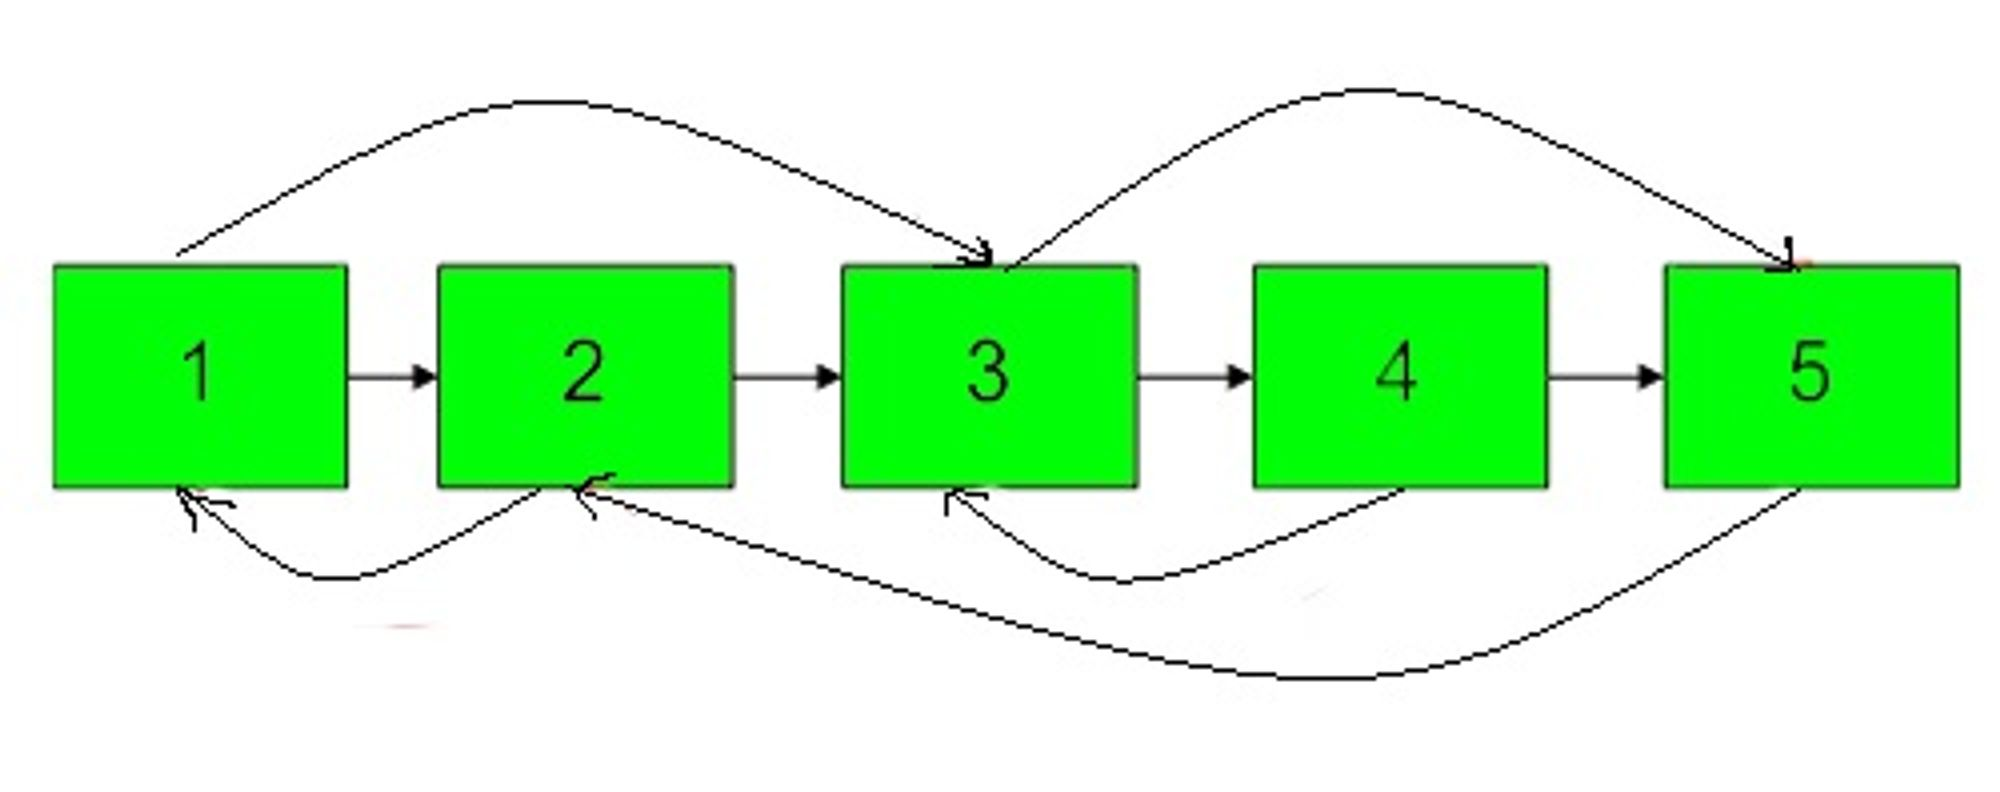
    
    
**Note** :- The diagram isn't part of any example, it just depicts an example of how the linked list may look like.

**Example 1:**
    
Input:
    
    N = 4, M = 2
    value = {1,2,3,4}
    pairs = {{1,2},{2,4}}
    Output:1
    Explanation:In this test case, there
    are 4 nodes in linked list.  Among these
    4 nodes,  2 nodes have arbitrary pointer
    set, rest two nodes have arbitrary pointer
    as NULL. Second line tells us the value
    of four nodes. The third line gives the
    information about arbitrary pointers.
    The first node arbitrary pointer is set to
    node 2.  The second node arbitrary pointer
    is set to node 4.

Example 2:

    Input:
    N = 4, M = 2
    value[] = {1,3,5,9}
    pairs[] = {{1,1},{3,4}}
    Output:1
    Explanation:In the given testcase ,
    applying the method as stated in the
    above example, the output will be 1.
        
</aside>

In [4]:
# Definition for a Node
class Node:
    def __init__(self, x):
        self.val = x
        self.next = None
        self.random = None

def copyRandomList(head):
    if not head:
        return None
    
    # Create a hashmap to store the mapping of original nodes to copied nodes
    hashmap = {}
    
    # Create a new head node for the copied linked list
    new_head = Node(head.val)
    hashmap[head] = new_head
    
    # Initialize the pointers for the original and copied linked lists
    original_node = head
    copied_node = new_head
    
    # Traverse the original linked list and create the copied nodes
    while original_node.next:
        # Create the next node in the copied linked list
        copied_node.next = Node(original_node.next.val)
        
        # Update the hashmap with the mapping of the original node to the copied node
        hashmap[original_node.next] = copied_node.next
        
        # Move the pointers forward
        original_node = original_node.next
        copied_node = copied_node.next
    
    # Reset the pointers for traversing the original and copied linked lists
    original_node = head
    copied_node = new_head
    
    # Traverse the original linked list and set the random pointers in the copied linked list
    while original_node:
        if original_node.random:
            # Get the copied node corresponding to the random node
            copied_node.random = hashmap[original_node.random]
        
        # Move the pointers forward
        original_node = original_node.next
        copied_node = copied_node.next
    
    return new_head

# Create the original linked list
head = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)

head.next = node2
head.random = node2

node2.next = node3
node2.random = node4

node3.next = node4
node3.random = None

node4.next = None
node4.random = node2

# Copy the linked list
copied_head = copyRandomList(head)

# Traverse the copied linked list and print the values and random pointers
result = []
curr = copied_head
while curr:
    result.append((curr.val, curr.random.val if curr.random else None))
    curr = curr.next

print(result)  # Output: [(1, 2), (2, 4), (3, None), (4, 2)]



[(1, 2), (2, 4), (3, None), (4, 2)]


<aside>
💡 **Question 5**

Given the `head` of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return *the reordered list*.

The **first** node is considered **odd**, and the **second** node is **even**, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in `O(1)` extra space complexity and `O(n)` time complexity.

Example 1:  
    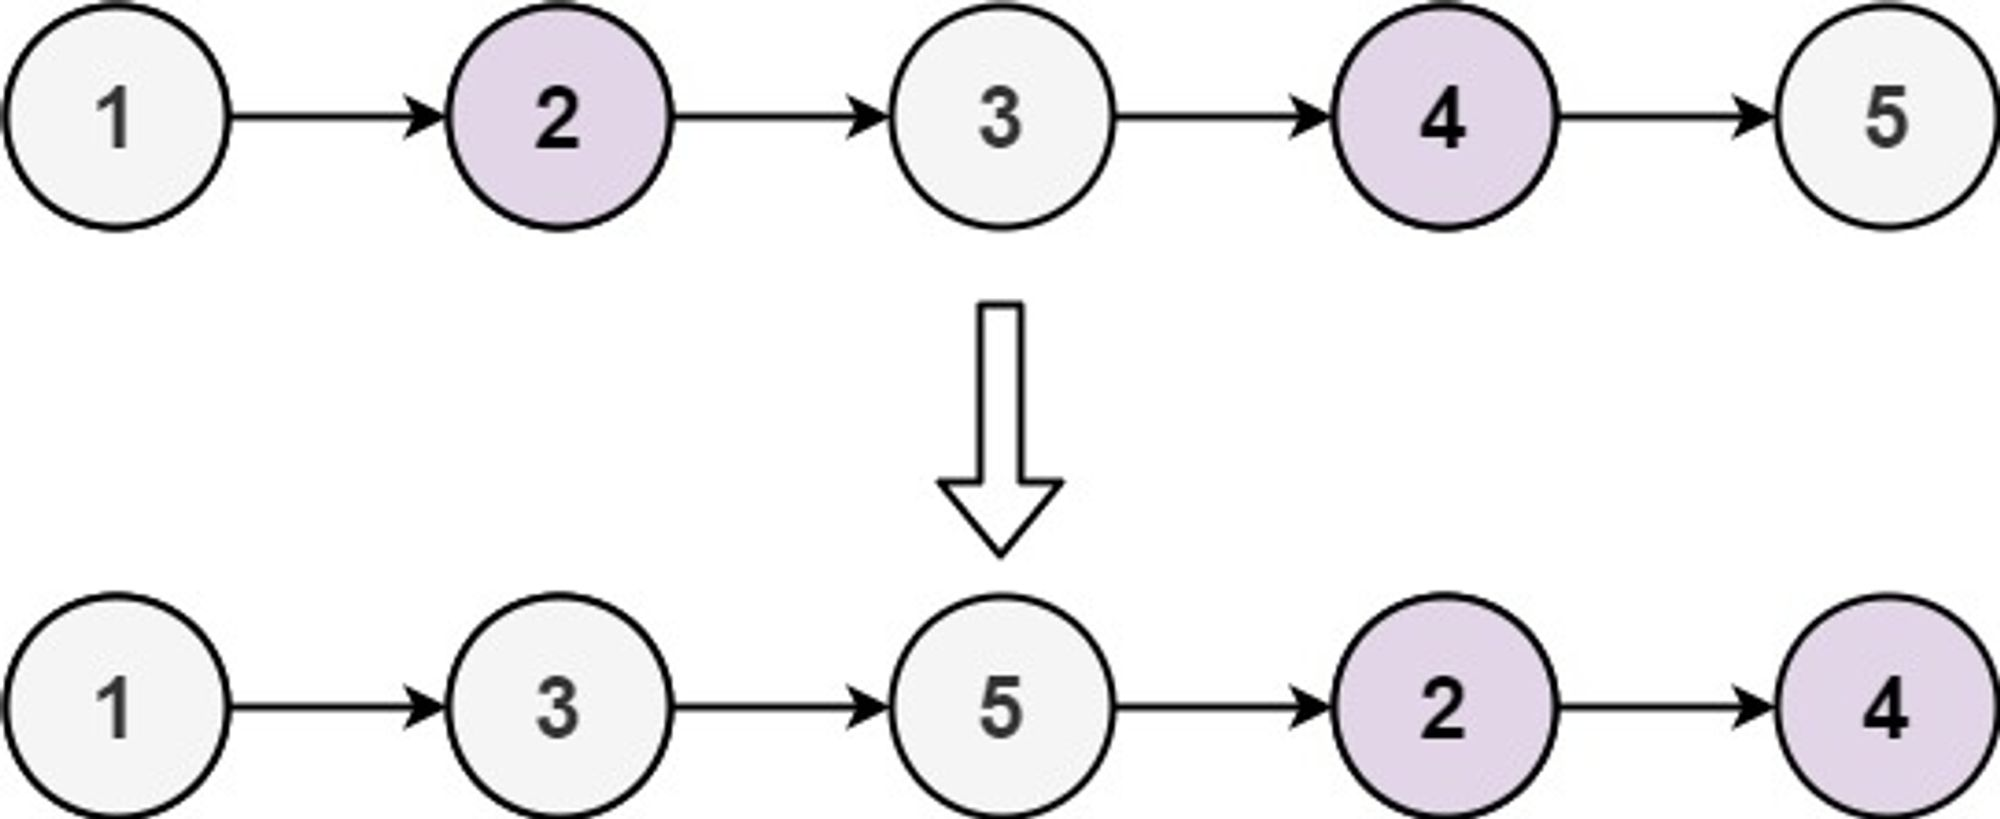
    
    Input: head = [1,2,3,4,5]
Output: [1,3,5,2,4]

Example 2:
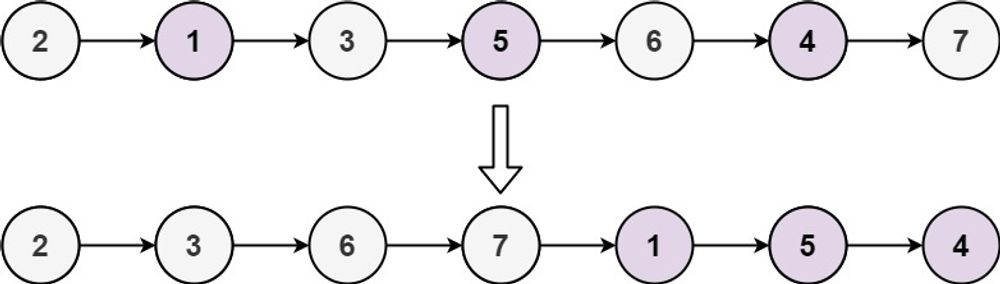
    
Input: head = [2,1,3,5,6,4,7]
Output: [2,3,6,7,1,5,4]
    

</aside>


In [5]:
# Definition for a singly linked list node
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def oddEvenList(head):
    if not head or not head.next:
        return head
    
    odd_head = head
    even_head = head.next
    odd = odd_head
    even = even_head
    
    while even and even.next:
        odd.next = even.next
        odd = odd.next
        even.next = odd.next
        even = even.next
    
    odd.next = even_head
    
    return odd_head

# Helper function to convert a list to a linked list
def listToLinkedList(lst):
    head = ListNode(0)
    curr = head
    for val in lst:
        curr.next = ListNode(val)
        curr = curr.next
    return head.next

# Helper function to convert a linked list to a list
def linkedListToList(head):
    result = []
    curr = head
    while curr:
        result.append(curr.val)
        curr = curr.next
    return result

# Test case 1
head1 = listToLinkedList([1, 2, 3, 4, 5])
reordered1 = oddEvenList(head1)
print(linkedListToList(reordered1))  # Output: [1, 3, 5, 2, 4]

# Test case 2
head2 = listToLinkedList([2, 1, 3, 5, 6, 4, 7])
reordered2 = oddEvenList(head2)
print(linkedListToList(reordered2))  # Output: [2, 3, 6, 7, 1, 5, 4]


[1, 3, 5, 2, 4]
[2, 3, 6, 7, 1, 5, 4]


<aside>
💡 **Question 6**

Given a singly linked list of size **N**. The task is to **left-shift** the linked list by **k** nodes, where **k** is a given positive integer smaller than or equal to length of the linked list.

**Example 1:**

```
Input:
N = 5
value[] = {2, 4, 7, 8, 9}
k = 3
Output:8 9 2 4 7
Explanation:Rotate 1:4 -> 7 -> 8 -> 9 -> 2
Rotate 2: 7 -> 8 -> 9 -> 2 -> 4
Rotate 3: 8 -> 9 -> 2 -> 4 -> 7

```

**Example 2:**
    
Input:
N = 8
value[] = {1, 2, 3, 4, 5, 6, 7, 8}
k = 4
Output:5 6 7 8 1 2 3 4

</aside>

In [6]:
# Definition for a singly linked list node
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def leftRotate(head, k):
    if not head or not head.next or k == 0:
        return head

    # Find the length of the linked list
    length = 0
    curr = head
    while curr:
        length += 1
        curr = curr.next

    # Adjust k if it's greater than or equal to length
    k %= length

    if k == 0:
        return head

    # Find the new head and tail of the rotated list
    new_head = head
    tail = head
    for _ in range(k):
        tail = tail.next

    while tail.next:
        new_head = new_head.next
        tail = tail.next

    # Rotate the list
    tail.next = head
    head = new_head.next
    new_head.next = None

    return head

# Helper function to convert a list to a linked list
def listToLinkedList(lst):
    head = ListNode(0)
    curr = head
    for val in lst:
        curr.next = ListNode(val)
        curr = curr.next
    return head.next

# Helper function to convert a linked list to a list
def linkedListToList(head):
    result = []
    curr = head
    while curr:
        result.append(curr.val)
        curr = curr.next
    return result

# Test case 1
head1 = listToLinkedList([2, 4, 7, 8, 9])
k1 = 2
rotated1 = leftRotate(head1, k1)
print(linkedListToList(rotated1))  # Output: [8, 9, 2, 4, 7]

# Test case 2
head2 = listToLinkedList([1, 2, 3, 4, 5, 6, 7, 8])
k2 = 4
rotated2 = leftRotate(head2, k2)
print(linkedListToList(rotated2))  # Output: [5, 6, 7, 8, 1, 2, 3, 4]


[8, 9, 2, 4, 7]
[5, 6, 7, 8, 1, 2, 3, 4]


<aside>
💡 **Question 7**

You are given the `head` of a linked list with `n` nodes.

For each node in the list, find the value of the **next greater node**. That is, for each node, find the value of the first node that is next to it and has a **strictly larger** value than it.

Return an integer array `answer` where `answer[i]` is the value of the next greater node of the `ith` node (**1-indexed**). If the `ith` node does not have a next greater node, set `answer[i] = 0`.

**Example 1:**

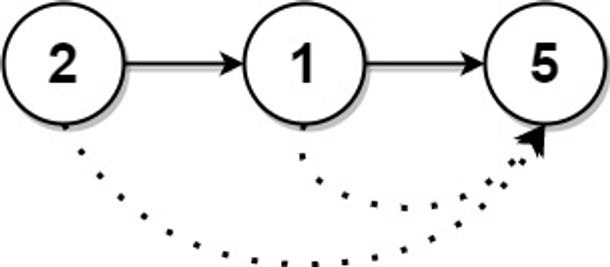
    
Input: head = [2,1,5]
Output: [5,5,0]

Example 2:

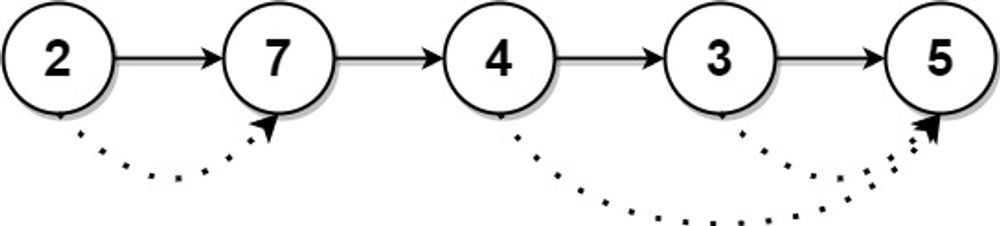
    
Input: head = [2,7,4,3,5]
Output: [7,0,5,5,0]
</aside>

In [7]:
# Definition for a singly linked list node
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def nextLargerNodes(head):
    # Step 1: Initialize stack and result list
    stack = []
    result = []

    # Step 2: Traverse linked list in reverse order
    curr = head
    while curr:
        # Pop nodes from stack with smaller values
        while stack and stack[-1].val <= curr.val:
            stack.pop()

        # Update next greater values in result list
        result.append(stack[-1].val if stack else 0)

        # Push current node onto the stack
        stack.append(curr)

        # Move to the next node in the linked list
        curr = curr.next

    # Step 3: Reverse the result list
    result.reverse()

    # Step 4: Return the result list
    return result

# Helper function to convert a list to a linked list
def listToLinkedList(lst):
    head = ListNode(0)
    curr = head
    for val in lst:
        curr.next = ListNode(val)
        curr = curr.next
    return head.next

# Test case 1
head1 = listToLinkedList([2, 1, 5])
result1 = nextLargerNodes(head1)
print(result1)  # Output: [5, 5, 0]

# Test case 2
head2 = listToLinkedList([2, 7, 4, 3, 5])
result2 = nextLargerNodes(head2)
print(result2)  # Output: [7, 0, 5, 5, 0]


[0, 2, 0]
[7, 4, 7, 0, 0]


<aside>
💡 **Question 8**

Given the `head` of a linked list, we repeatedly delete consecutive sequences of nodes that sum to `0` until there are no such sequences.

After doing so, return the head of the final linked list.  You may return any such answer.

(Note that in the examples below, all sequences are serializations of `ListNode` objects.)

**Example 1:**

```
Input: head = [1,2,-3,3,1]
Output: [3,1]
Note: The answer [1,2,1] would also be accepted.

```

**Example 2:**

```
Input: head = [1,2,3,-3,4]
Output: [1,2,4]

```

**Example 3:**

```
Input: head = [1,2,3,-3,-2]
Output: [1]
```

</aside>

In [8]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def removeZeroSumSublists(head):
    dummy = ListNode(0)
    dummy.next = head

    hashmap = {}
    curr = dummy
    running_sum = 0

    while curr:
        running_sum += curr.val

        if running_sum in hashmap:
            prev = hashmap[running_sum]
            node = prev.next
            temp_sum = running_sum + node.val

            while temp_sum != running_sum:
                del hashmap[temp_sum]
                node = node.next
                temp_sum += node.val

            prev.next = node.next
        else:
            hashmap[running_sum] = curr

        curr = curr.next

    return dummy.next

def listToLinkedList(lst):
    head = ListNode(0)
    curr = head
    for val in lst:
        curr.next = ListNode(val)
        curr = curr.next
    return head.next

def linkedListToList(head):
    lst = []
    curr = head
    while curr:
        lst.append(curr.val)
        curr = curr.next
    return lst

# Test case 1
head1 = listToLinkedList([1, 2, -3, 3, 1])
result1 = removeZeroSumSublists(head1)
print(linkedListToList(result1))  # Output: [3, 1] or [1, 2, 1]

# Test case 2
head2 = listToLinkedList([1, 2, 3, -3, 4])
result2 = removeZeroSumSublists(head2)
print(linkedListToList(result2))  # Output: [1, 2, 4]

# Test case 3
head3 = listToLinkedList([1, 2, 3, -3, -2])
result3 = removeZeroSumSublists(head3)
print(linkedListToList(result3))  # Output: [1]


[3, 1]
[1, 2, 4]
[1]
